# 📈 Projeto 2: Análise de Séries Temporais com Pandas  
## 1. Introdução  
Neste projeto, me dedicarei à Análise de Séries Temporais. Utilizando um conjunto de dados simulado de tráfego de um site para demonstrar como o `pandas` nos permite:  
- Preparar dados com datas.  
- Reamostrar dados para diferentes frequências (ex: de diário para semanal).  
- Calcular métricas de janela móvel (médias móveis) para suavizar a série e identificar tendências.  


---
## 2. Importação de Bibliotecas
Primeiro, importo as bibliotecas necessárias para a análise e visualização.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

---
## 3. Criação de Dados Simulado
Vou criar um conjunto de dados simulado de 180 dias de tráfego diário. Ele terá uma tendência crescente e um ruído aleatório para imitar dados reais.

In [2]:
# Criando um intervalo de datas diário
datas = pd.date_range(start='2024-01-01', periods=180, freq='D')

# Criando dados de tráfego com tendência e sazonalidade
tráfego_base = np.linspace(100, 300, 180)
ruido = np.random.normal(loc=0, scale=20, size=180)
sazonalidade_semanal = np.sin(np.arange(180) * 2 * np.pi / 7) * 25

tráfego_total = (tráfego_base + ruido + sazonalidade_semanal).round().astype(int)
tráfego_total[tráfego_total < 0] = 0 # Garantindo que não haja valores negativos

df_trafego = pd.DataFrame({'Data': datas, 'Tráfego': tráfego_total})

print("Dados Brutos:")
display(df_trafego.head())

Dados Brutos:


,Data,Tráfego
0,2024-01-01,72
1,2024-01-02,125
2,2024-01-03,144
3,2024-01-04,79
4,2024-01-05,90


---
## 4. Preparação dos Dados de Tempo  
Para que o `pandas` reconheça as datas e permita usar suas ferramentas de séries temporais, preciso definir a coluna **'Data'** como o índice do DataFrame.

DataFrame com índice de data:


,Tráfego
Data,
2024-01-01,72
2024-01-02,125
2024-01-03,144
2024-01-04,79
2024-01-05,90



Informações do DataFrame após a conversão:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2024-01-01 to 2024-06-28
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Tráfego  180 non-null    int32
dtypes: int32(1)
memory usage: 2.1 KB


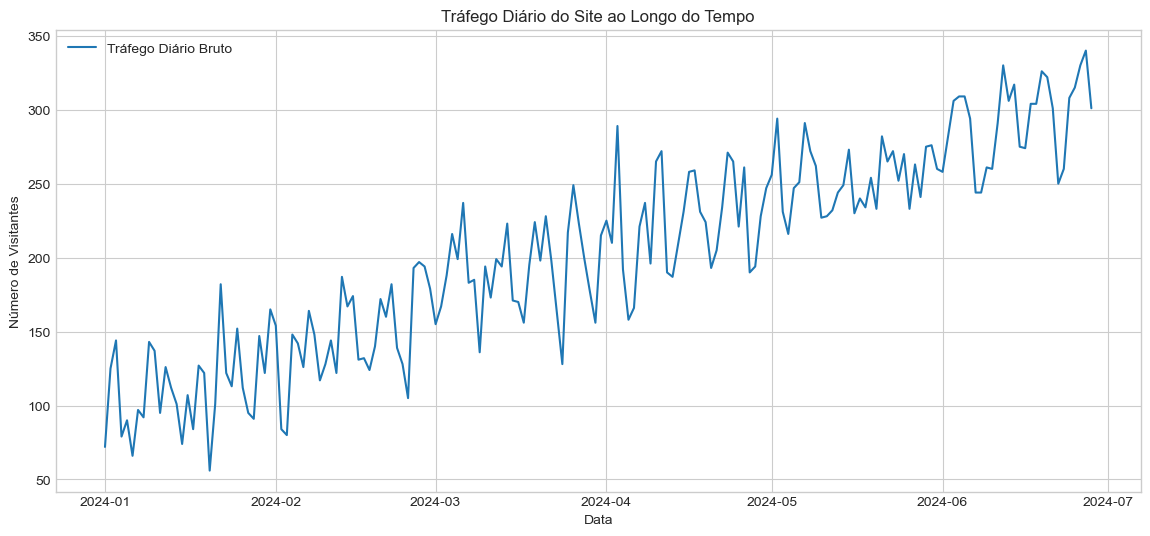

In [4]:
# Convertendo a coluna 'Data' para o tipo datetime (se ainda não for) e a definindo como índice
df_trafego['Data'] = pd.to_datetime(df_trafego['Data'])
df_trafego.set_index('Data', inplace=True)

print("DataFrame com índice de data:")
display(df_trafego.head())

print("\nInformações do DataFrame após a conversão:")
df_trafego.info()

# Visualizando a série temporal bruta
plt.figure(figsize=(14, 6))
plt.plot(df_trafego['Tráfego'], label='Tráfego Diário Bruto')
plt.title('Tráfego Diário do Site ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Visitantes')
plt.legend()
plt.show()

---
## 5. Análise de Sazonalidade e Tendências
Agora vou aplicar duas das técnicas mais poderosas para analisar séries temporais: **reamostragem** e **médias móveis**.

### 5.1. Reamostragem (Resampling)
E vou reamostrar os dados diários para resumos semanais e mensais. Isso ajuda a suavizar o ruído e a ver a tendência de forma mais clara.

In [5]:
# Reamostrando para a frequência semanal (W) e somando os valores
df_semanal = df_trafego.resample('W').sum()

# Reamostrando para a frequência mensal (M) e calculando a média
df_mensal = df_trafego.resample('M').mean().round()

print("Dados reamostrados para a frequência semanal:")
display(df_semanal.head())

print("\nDados reamostrados para a frequência mensal:")
display(df_mensal)

Dados reamostrados para a frequência semanal:


C:\Users\marlo\AppData\Local\Temp\ipykernel_12180\2495528288.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df_trafego.resample('M').mean().round()


,Tráfego
Data,
2024-01-07,673
2024-01-14,806
2024-01-21,671
2024-01-28,867
2024-02-04,900



Dados reamostrados para a frequência mensal:


,Tráfego
Data,
2024-01-31,111.0
2024-02-29,147.0
2024-03-31,191.0
2024-04-30,224.0
2024-05-31,253.0
2024-06-30,294.0


---
### 5.2. Médias Móveis (Rolling)
Vou calcular uma média móvel de 7 dias para suavizar a curva e identificar a tendência subjacente, removendo a sazonalidade semanal.

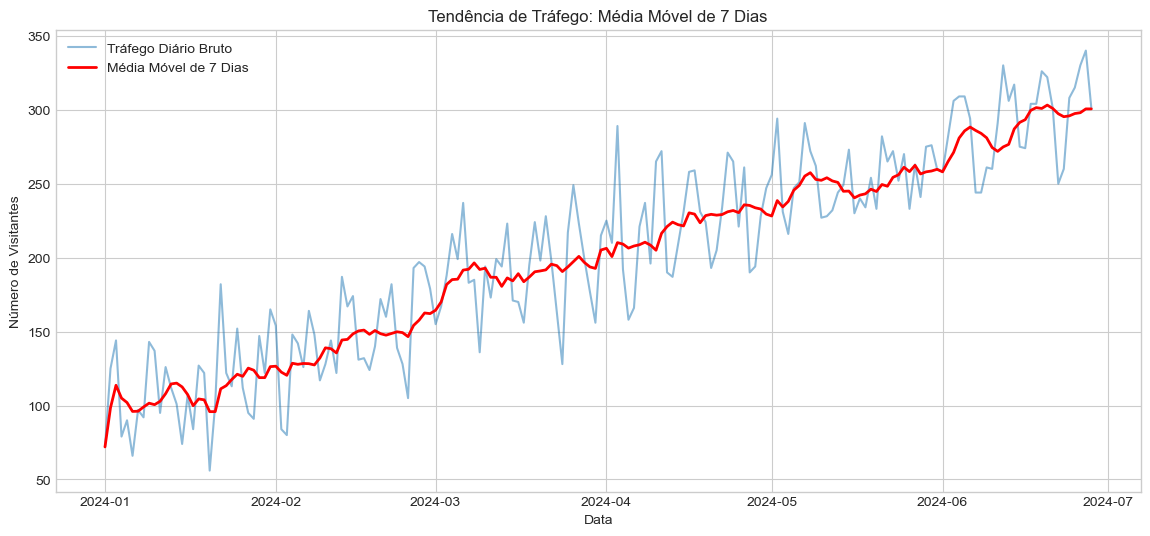

In [6]:
# Calculando a média móvel de 7 dias
df_trafego['Media_Movel_7d'] = df_trafego['Tráfego'].rolling(window=7, min_periods=1).mean()

# Plotando os dados brutos e a média móvel
plt.figure(figsize=(14, 6))
plt.plot(df_trafego['Tráfego'], label='Tráfego Diário Bruto', alpha=0.5)
plt.plot(df_trafego['Media_Movel_7d'], label='Média Móvel de 7 Dias', color='red', linewidth=2)
plt.title('Tendência de Tráfego: Média Móvel de 7 Dias')
plt.xlabel('Data')
plt.ylabel('Número de Visitantes')
plt.legend()
plt.show()

---
## 🏁 6. Conclusão

Neste projeto, demonstrei como o **`pandas`** é uma ferramenta essencial para a análise de **séries temporais**. Eu:  

- **1.** Preparei dados com datas definindo o índice do DataFrame.  
- **2.** Reamostrei os dados para diferentes granularidades (**semanal** e **mensal**) para uma visão de alto nível.  
- **3.** Calculei uma **média móvel** para suavizar a série e destacar a **tendência de longo prazo**.  

Essas habilidades são a base para análises de negócios, como **previsão de vendas** e **monitoramento de desempenho** ao longo do tempo.